## 不同的网络权重初始化方法对网络学习的影响
### 以下分析中网络参数均不包含bias

In [75]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## normal intialization & tanh

In [71]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.Tanh(), 
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.Tanh(), 
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.Tanh(), 
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.Tanh())
    
    def forward(self, x):
        return self.fc(x)

In [72]:
def normal_init_weights(model, std):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.normal_(tensor=m.weight, mean=0., std=std)

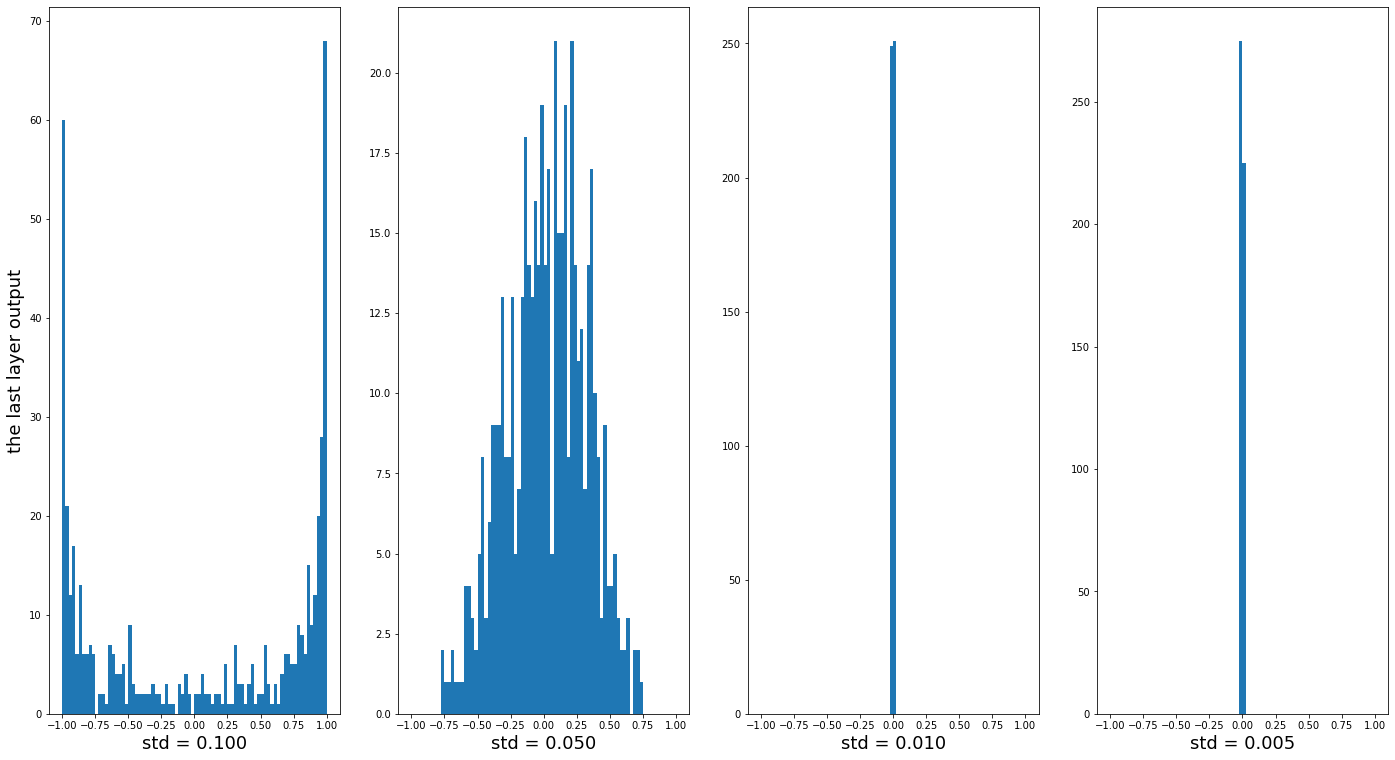

In [74]:
std = [0.1, 0.05, 0.01, 0.005]
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)
for i, scale in enumerate(std):
    normal_init_weights(model, scale)
    feature = model(torch.from_numpy(x))
    ax = fig.add_subplot(1, len(std), i+1)
    ax.hist(feature.detach().numpy(), bins=80, range=[-1, 1])
    ax.set_xlabel('std = %.3f' % scale, fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用正态分布进行网络参数初始化时，较大的std意味着初始化的权重离均值$\mu$较远，比较容易取到大于1和小于-1的值，每层相同位置的weight值同时大于1和小于-1的出现概率就会非常大，tanh激活函数又会将较大的正数映射为1较小的负数映射为-1，因此我们可以看到std=0.1时网络的输出大部分都集中在-1和１附近，且这种情况会随着网络的加深变得越来越显著，反向传播时容易出现梯度爆炸的现象。反过来，当std较小时，网络参数取值大部分位于[-1, 1]，这些位于0附近的值累乘，输出值就趋近于0，而$\tanh(0)=0$

## normal initization & sigmoid

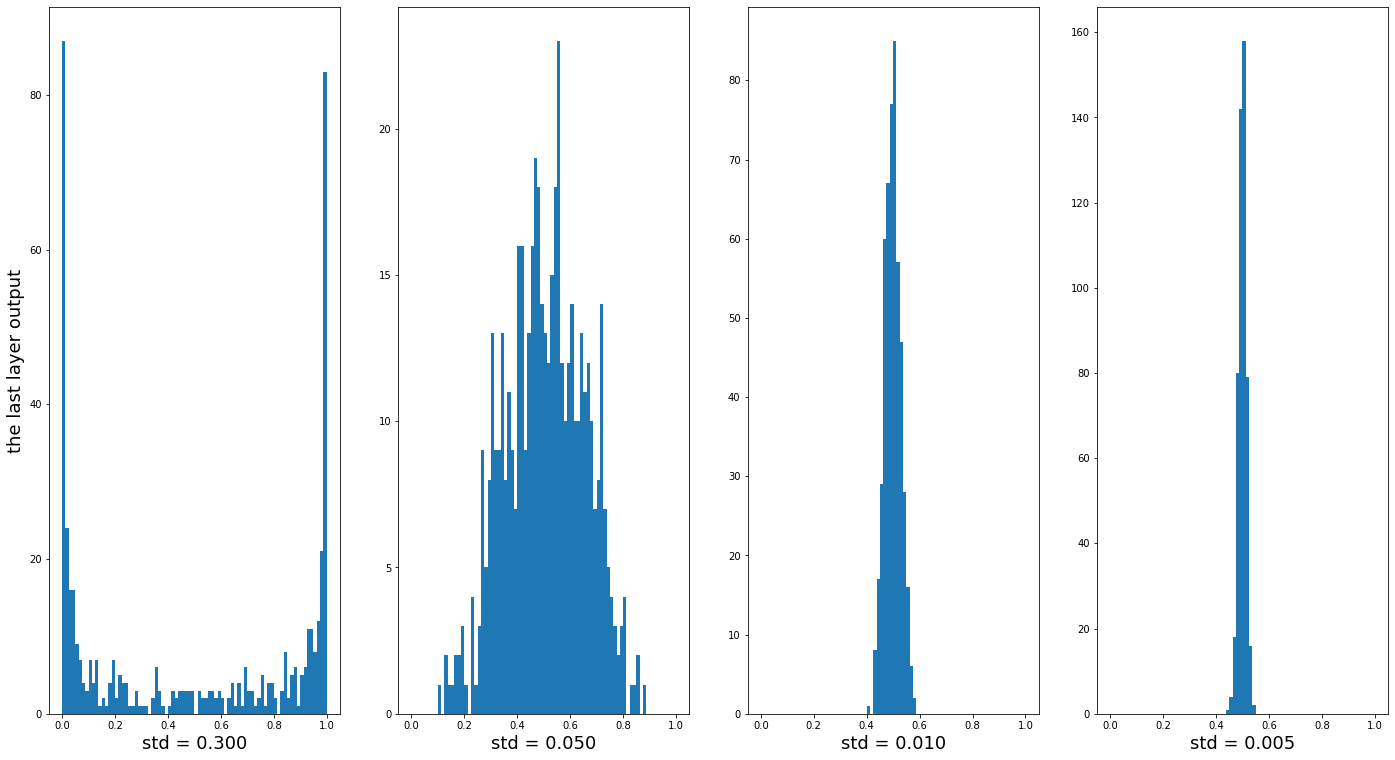

In [78]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.Sigmoid())
    
    def forward(self, x):
        return self.fc(x)
    
def normal_init_weights(model, std):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.normal_(tensor=m.weight, mean=0., std=std)
            
std = [0.3, 0.05, 0.01, 0.005]
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)
for i, scale in enumerate(std):
    normal_init_weights(model, scale)
    feature = model(torch.from_numpy(x))
    ax = fig.add_subplot(1, len(std), i+1)
    ax.hist(feature.detach().numpy(), bins=80, range=[0, 1])
    ax.set_xlabel('std = %.3f' % scale, fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 激活函数为sigmoid时，情况和tanh类似，只是sigmoid的输出范围为0至1，最后一层输出的元素取值在std较大时集中在0和１，std值较小时会集中在0.5(因为$\delta(0)=0.5$)

## normal initization & relu

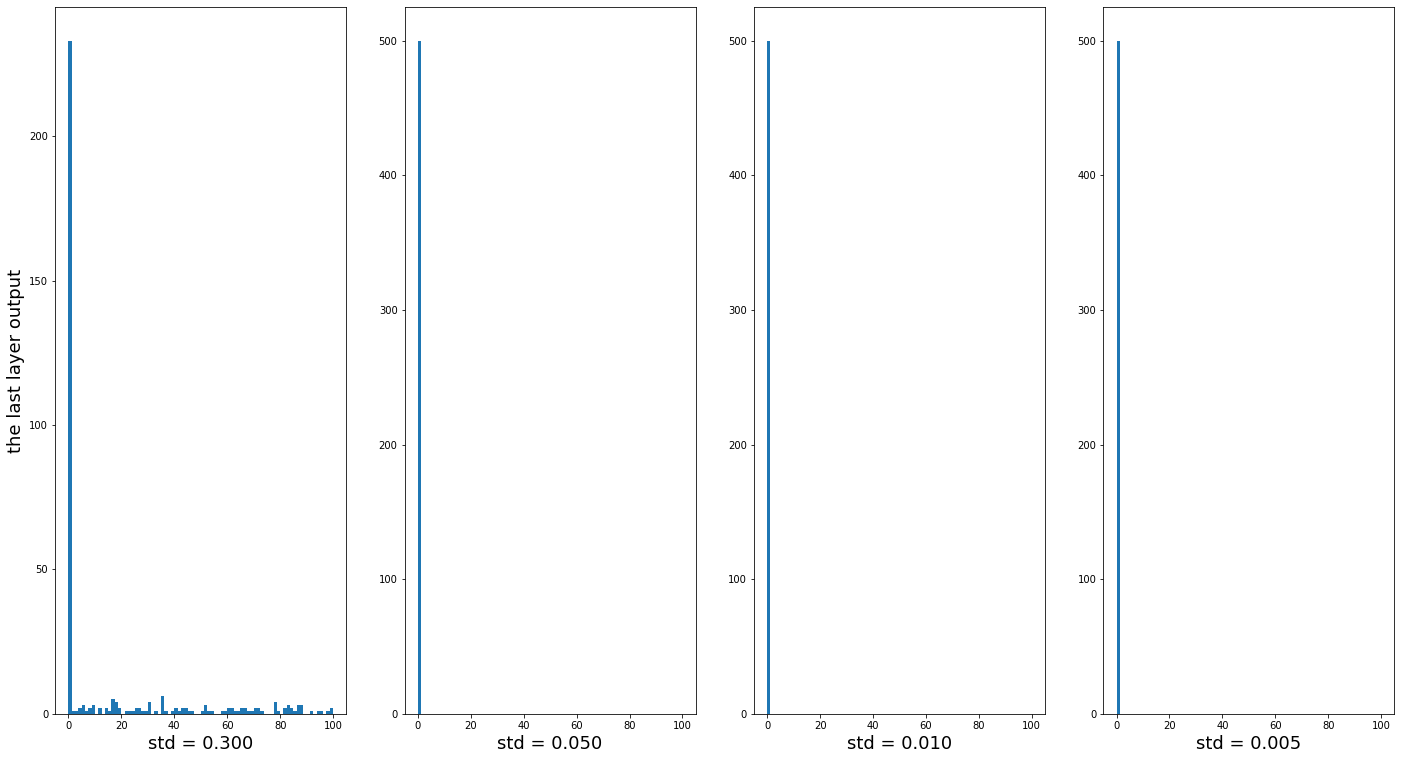

In [107]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.ReLU(), 
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.ReLU(), 
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.ReLU(), 
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.ReLU())
    
    def forward(self, x):
        return self.fc(x)
    
def normal_init_weights(model, std):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.normal_(tensor=m.weight, mean=0., std=std)
            
std = [0.3, 0.05, 0.01, 0.005]
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)
for i, scale in enumerate(std):
    normal_init_weights(model, scale)
    feature = model(torch.from_numpy(x))
    ax = fig.add_subplot(1, len(std), i+1)
    ax.hist(feature.detach().numpy(), bins=80, range=[0, 100])
    ax.set_xlabel('std = %.3f' % scale, fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用高斯分布随机初始化weights，且激活函数为relu时，初始化的std对输出影响不明显，如果必须使用随机初始化方法配合relu激活函数时，初始化的std要尽可能的取大一点。因为从上面的结果可以看到，当std较大时最后一层的输出值的分布还是比较均匀的，若初始化的时候权重取值都集中在0附近时，各layer的输出都集中于0

## xavier intialization & tanh

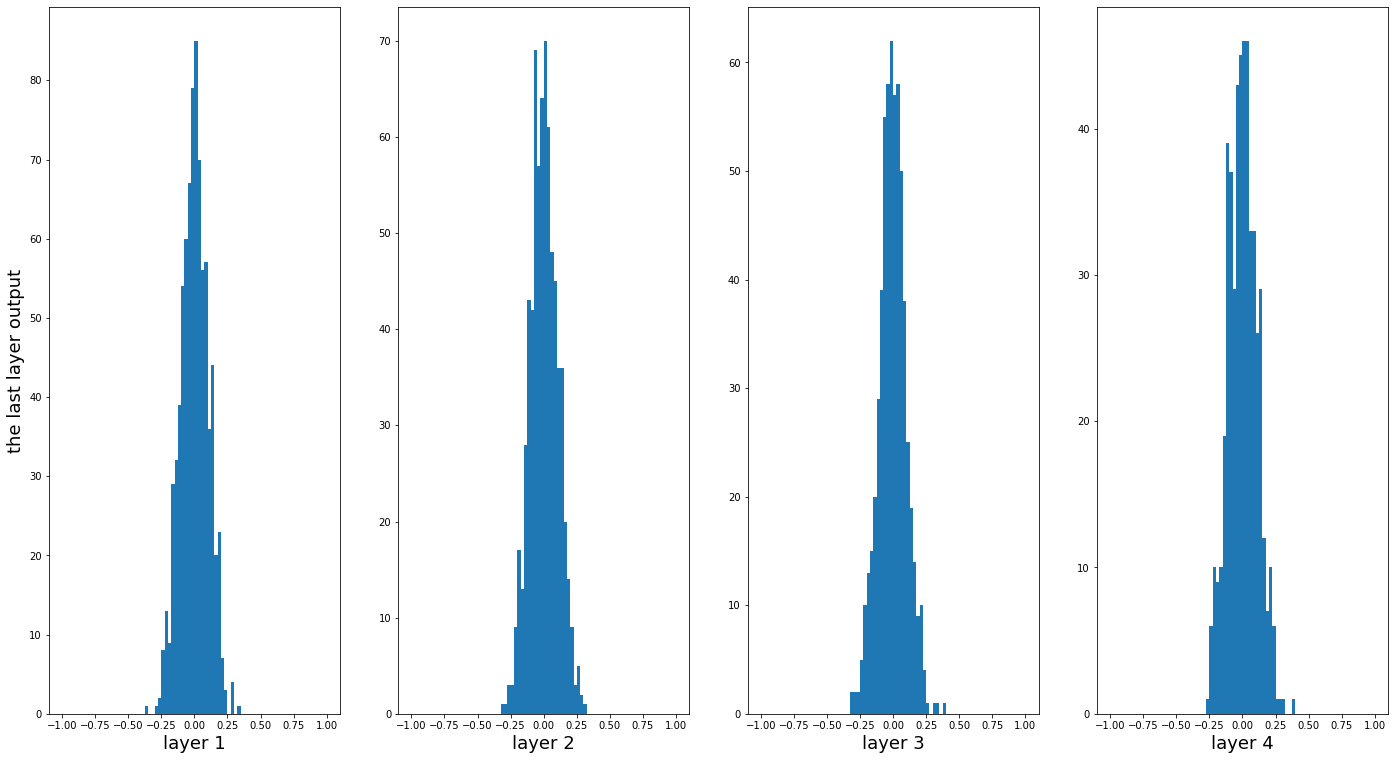

In [91]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.Tanh(),)
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.Tanh(), )
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.Tanh(), )
        self.fc4 = torch.nn.Sequential(
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.Tanh())
    
    def forward(self, x):
        feat1 = self.fc1(x)
        feat2 = self.fc2(feat1)
        feat3 = self.fc3(feat2)
        feat4 = self.fc4(feat3)
        return feat1, feat2, feat3, feat4
    
def xavier_init_weights(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.xavier_normal_(tensor=m.weight)
            
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)

xavier_init_weights(model)
features = model(torch.from_numpy(x))
for i, f in enumerate(features):
    ax = fig.add_subplot(1, len(features), i+1)
    ax.hist(f.detach().numpy(), bins=80, range=[-1, 1])
    ax.set_xlabel('layer %d' % (i +1), fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用xavier初始化方法配合tanh激活函数，可见每一层的输出元素值分布都呈现出正态分布形状，也就是说输出值没有集中在某几个值极端值附近从而影响反向传播

## xavier intialization & sigmoid

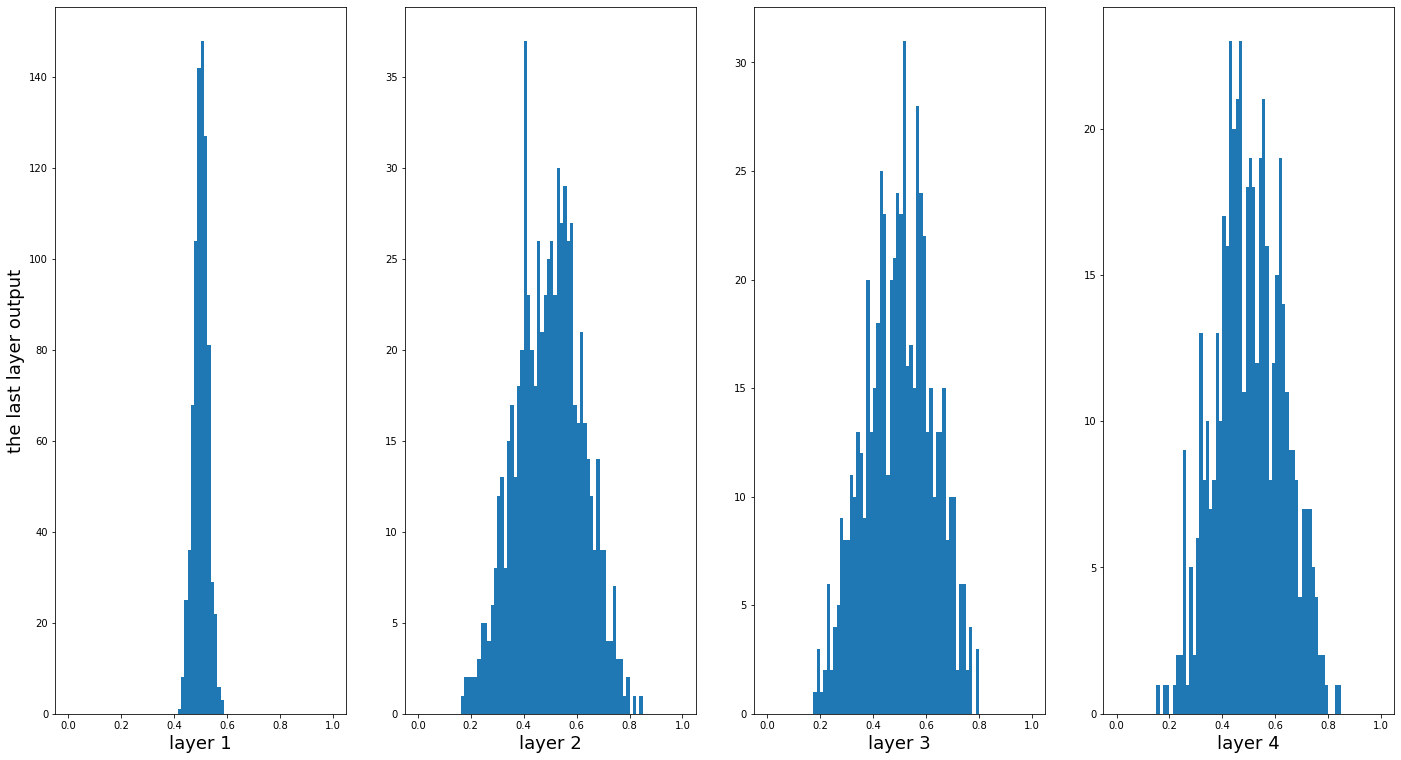

In [93]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.Sigmoid(),)
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.Sigmoid(), )
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.Sigmoid(), )
        self.fc4 = torch.nn.Sequential(
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.Sigmoid())
    
    def forward(self, x):
        feat1 = self.fc1(x)
        feat2 = self.fc2(feat1)
        feat3 = self.fc3(feat2)
        feat4 = self.fc4(feat3)
        return feat1, feat2, feat3, feat4
    
def xavier_init_weights(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.xavier_normal_(tensor=m.weight)
            
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)

xavier_init_weights(model)
features = model(torch.from_numpy(x))
for i, f in enumerate(features):
    ax = fig.add_subplot(1, len(features), i+1)
    ax.hist(f.detach().numpy(), bins=80, range=[0, 1])
    ax.set_xlabel('layer %d' % (i +1), fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用xavier初始化方法配合sigmoid激活函数的效果较好，有利于反向传播

## xavier intialization & relu

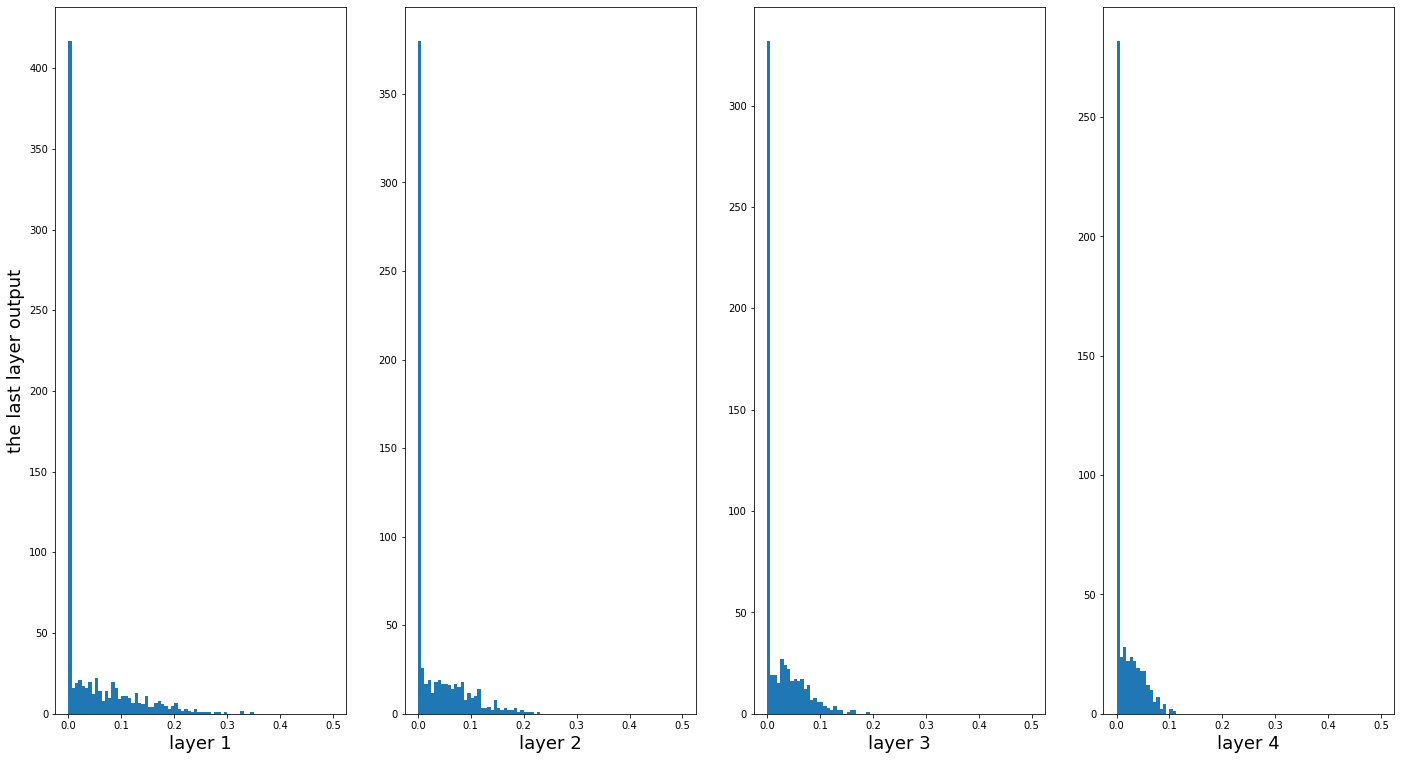

In [100]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.ReLU(),)
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.ReLU(), )
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.ReLU(), )
        self.fc4 = torch.nn.Sequential(
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.ReLU())
    
    def forward(self, x):
        feat1 = self.fc1(x)
        feat2 = self.fc2(feat1)
        feat3 = self.fc3(feat2)
        feat4 = self.fc4(feat3)
        return feat1, feat2, feat3, feat4
    
def xavier_init_weights(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.xavier_normal_(tensor=m.weight)
            
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)

xavier_init_weights(model)
features = model(torch.from_numpy(x))
for i, f in enumerate(features):
    ax = fig.add_subplot(1, len(features), i+1)
    ax.hist(f.detach().numpy(), bins=80, range=[0, 0.5])
    ax.set_xlabel('layer %d' % (i +1), fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### xavier初始化方法配合relu激活函数效果看起来还不错，但该种组合呈现出一种趋势，就是随着网络层数的加深，越靠后的layer的输出分布越集中于0

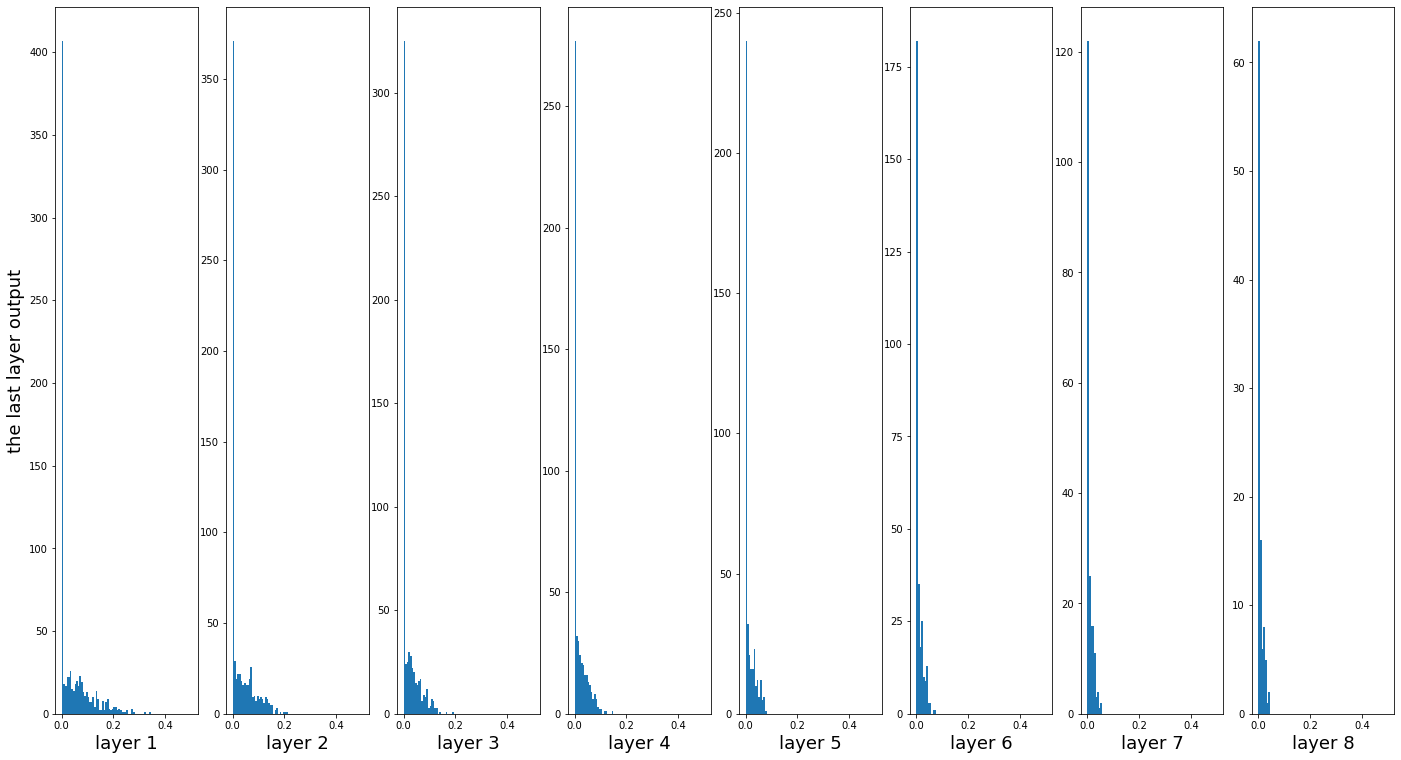

In [102]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.ReLU(),)
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.ReLU(), )
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.ReLU(), )
        self.fc4 = torch.nn.Sequential(
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.ReLU())
        self.fc5 = torch.nn.Sequential(
            torch.nn.Linear(in_features=500, out_features=400, bias=False), 
            torch.nn.ReLU())
        self.fc6 = torch.nn.Sequential(
            torch.nn.Linear(in_features=400, out_features=300, bias=False), 
            torch.nn.ReLU())
        self.fc7 = torch.nn.Sequential(
            torch.nn.Linear(in_features=300, out_features=200, bias=False), 
            torch.nn.ReLU())
        self.fc8 = torch.nn.Sequential(
            torch.nn.Linear(in_features=200, out_features=100, bias=False), 
            torch.nn.ReLU())
    
    def forward(self, x):
        feat1 = self.fc1(x)
        feat2 = self.fc2(feat1)
        feat3 = self.fc3(feat2)
        feat4 = self.fc4(feat3)
        feat5 = self.fc5(feat4)
        feat6 = self.fc6(feat5)
        feat7 = self.fc7(feat6)
        feat8 = self.fc8(feat7)
        return feat1, feat2, feat3, feat4, feat5, feat6, feat7, feat8
    
def xavier_init_weights(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.xavier_normal_(tensor=m.weight)
            
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)

xavier_init_weights(model)
features = model(torch.from_numpy(x))
for i, f in enumerate(features):
    ax = fig.add_subplot(1, len(features), i+1)
    ax.hist(f.detach().numpy(), bins=80, range=[0, 0.5])
    ax.set_xlabel('layer %d' % (i +1), fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用xavier初始化方法配合relu激活函数，在网络层数较浅时（在这个例子中<6层），各层的输出值分布比较均匀（均匀这个词用在这里不太合适，在这里的意思是输出值的分布不集中于某几个值的附近），但随着网络层数的加深，后面的layer的输出值分布逐渐呈现出集中在0附近的趋势越明显

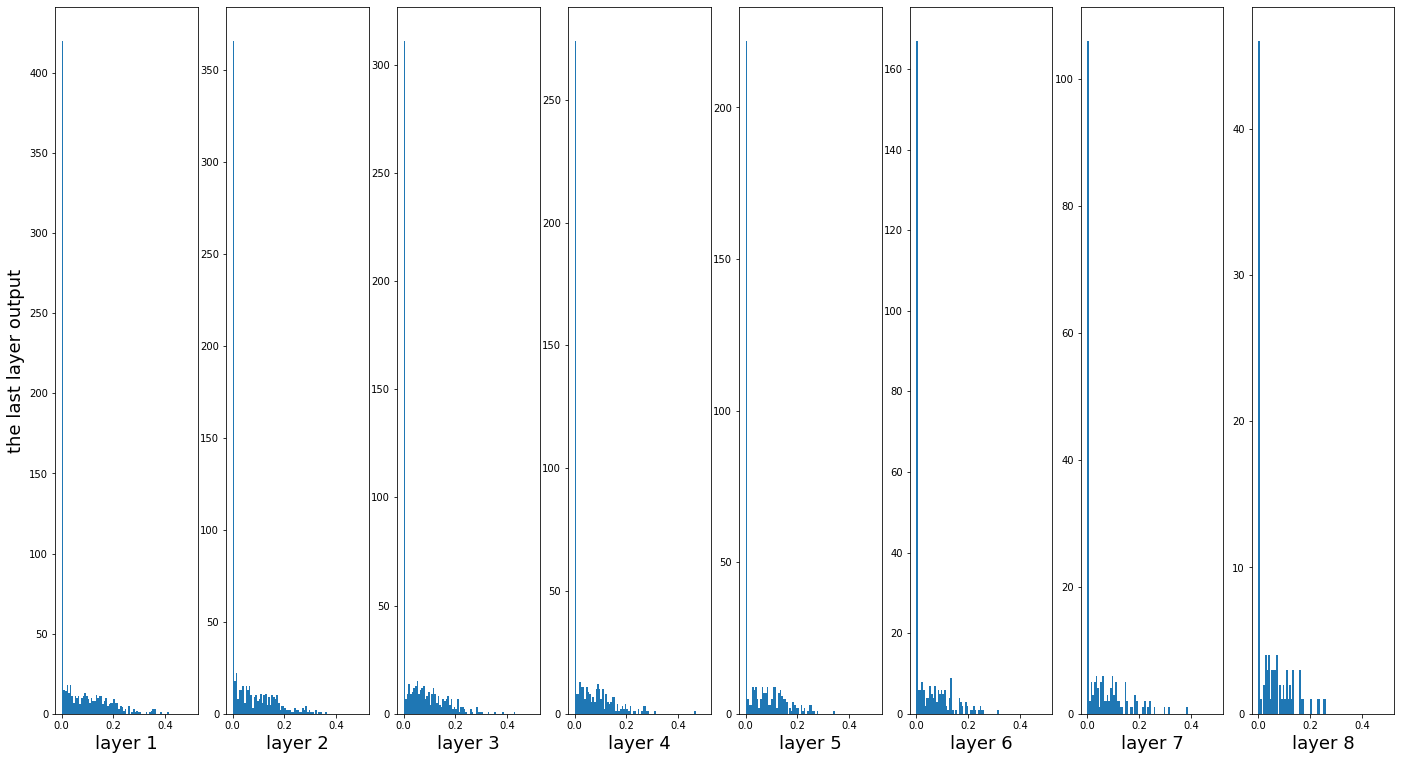

In [104]:
class LinearModel(torch.nn.Module):
    def __init__(self, in_features):
        super(LinearModel, self).__init__()
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=in_features, out_features=800, bias=False), 
            torch.nn.ReLU(),)
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=800, out_features=700, bias=False), 
            torch.nn.ReLU(), )
        self.fc3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=700, out_features=600, bias=False), 
            torch.nn.ReLU(), )
        self.fc4 = torch.nn.Sequential(
            torch.nn.Linear(in_features=600, out_features=500, bias=False), 
            torch.nn.ReLU())
        self.fc5 = torch.nn.Sequential(
            torch.nn.Linear(in_features=500, out_features=400, bias=False), 
            torch.nn.ReLU())
        self.fc6 = torch.nn.Sequential(
            torch.nn.Linear(in_features=400, out_features=300, bias=False), 
            torch.nn.ReLU())
        self.fc7 = torch.nn.Sequential(
            torch.nn.Linear(in_features=300, out_features=200, bias=False), 
            torch.nn.ReLU())
        self.fc8 = torch.nn.Sequential(
            torch.nn.Linear(in_features=200, out_features=100, bias=False), 
            torch.nn.ReLU())
    
    def forward(self, x):
        feat1 = self.fc1(x)
        feat2 = self.fc2(feat1)
        feat3 = self.fc3(feat2)
        feat4 = self.fc4(feat3)
        feat5 = self.fc5(feat4)
        feat6 = self.fc6(feat5)
        feat7 = self.fc7(feat6)
        feat8 = self.fc8(feat7)
        return feat1, feat2, feat3, feat4, feat5, feat6, feat7, feat8
    
def kaiming_init_weights(model):
    for m in model.modules():
        if isinstance(m, torch.nn.Linear):
            torch.nn.init.kaiming_normal_(tensor=m.weight, nonlinearity='relu')
            
x = np.random.normal(loc=0., scale=0.1, size=1000).astype(np.float32)
fig = plt.figure(figsize=[24, 13])

model = LinearModel(1000)

kaiming_init_weights(model)
features = model(torch.from_numpy(x))
for i, f in enumerate(features):
    ax = fig.add_subplot(1, len(features), i+1)
    ax.hist(f.detach().numpy(), bins=80, range=[0, 0.5])
    ax.set_xlabel('layer %d' % (i +1), fontsize=18)
    if i == 0:
        ax.set_ylabel('the last layer output', fontsize=18)

plt.show()

### 使用kaiming初始化方法配合relu激活函数，解决了使用xavier初始化方法在网络后续layer输出值消失的问题